In [45]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

from scipy.stats import variation
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, RocCurveDisplay

# Question (1) (a)

In [2]:
train = pd.read_csv('../data/aps_failure_training_set.csv')
test = pd.read_csv('../data/aps_failure_test_set.csv')
df = pd.concat([train.assign(data='train'), test.assign(data='test')], ignore_index=True)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,data
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,493384,721044,469792,339156,157956,73224,0,0,0,train
1,neg,33058,na,0,na,0,0,0,0,0,...,178064,293306,245416,133654,81140,97576,1500,0,0,train
2,neg,41040,na,228,100,0,0,0,0,0,...,159812,423992,409564,320746,158022,95128,514,0,0,train
3,neg,12,0,70,66,0,10,0,0,0,...,46,58,44,10,0,0,0,4,32,train
4,neg,60874,na,1368,458,0,0,0,0,0,...,229790,405298,347188,286954,311560,433954,1218,0,0,train


# Question (1) (b) (i)

In [3]:
X = df.iloc[:, 1:171]
Y = df[['class']].copy()

col_names = X.columns
X = X.replace('na', np.nan)
imp_mean = SimpleImputer()
imp_mean = imp_mean.fit(X)
X = pd.DataFrame(imp_mean.transform(X))
X.columns = col_names

In [4]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Question (1) (b) (ii)

In [5]:
CVs = variation(X)
print(CVs)

[  4.32857936   2.17825826   2.16763905 206.72013957  22.29352376
  18.20889571  91.46005188  42.08406566  17.62579261   8.75324193
   5.47508023   2.96421043   2.3525724    2.81247947   6.2749388
  32.16684571   2.31552486  18.50618638  43.14419572  78.62247048
   9.11193127   9.0671358    2.25421182   2.2760995    3.08586459
   2.85345254  10.56913279 113.88200615  23.18690738  86.08507116
   5.73044766   3.8590096   40.90224966  49.24831058  38.34206692
  28.32984924  33.03991459  12.00898155   3.02190155   3.24987397
   3.94375532  77.46059169   9.01981026   7.37491861  12.05034852
   7.5655194    2.83779628   3.06662893   8.70434915  15.38205557
  22.41473126  77.99904323   2.68854544   2.64752782   2.88691619
   2.72995632   2.64141022   2.70332199   2.99691913   2.82208042
   6.70502527   9.52592774   2.40993725   6.69727311   5.08585082
   6.35540973   7.05244583   2.31345084   2.62496658   3.0106525
   3.57963009   0.73016082   0.73235958   0.59427393   0.51760949
   0.4628960

# Question (1) (b) (iii)

In [6]:
X.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019725,-0.011658,-0.000541,0.025795,0.035994,0.011682,0.076378,0.195161,0.307443,...,0.414125,0.419912,0.409659,0.419780,0.425679,0.356969,0.259668,0.133764,0.006688,0.010330
ab_000,0.019725,1.000000,-0.010898,0.000066,0.024869,0.043276,0.000590,0.006547,0.023484,0.035696,...,0.025161,0.037052,0.028766,0.034201,0.023921,0.013598,0.002371,0.000506,0.046897,0.075683
ac_000,-0.011658,-0.010898,1.000000,-0.002030,-0.004769,-0.010612,0.015534,-0.002333,-0.009439,-0.022889,...,-0.009808,-0.006437,-0.007962,-0.008115,-0.014680,-0.018631,0.010435,0.017293,-0.006191,0.015826
ad_000,-0.000541,0.000066,-0.002030,1.000000,-0.000195,-0.000236,-0.000038,-0.000034,-0.000093,-0.000223,...,-0.000883,-0.000921,-0.000908,-0.000730,-0.000745,-0.000462,-0.000794,-0.000500,-0.000082,-0.000091
ae_000,0.025795,0.024869,-0.004769,-0.000195,1.000000,0.829986,-0.000441,-0.000609,0.001948,0.020678,...,0.012751,0.019441,0.012847,0.026437,0.066533,0.036619,-0.008393,-0.006952,0.063587,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356969,0.013598,-0.018631,-0.000462,0.036619,0.046482,0.007631,0.068003,0.181967,0.475570,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227098,0.063065,-0.000309,0.000946
ee_008,0.259668,0.002371,0.010435,-0.000794,-0.008393,-0.010843,0.000067,0.005353,0.009109,0.020684,...,0.442532,0.470574,0.448390,0.394020,0.365686,0.227098,1.000000,0.690147,-0.005173,-0.001950
ee_009,0.133764,0.000506,0.017293,-0.000500,-0.006952,-0.008539,-0.001103,-0.003540,-0.009089,-0.018164,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003168,-0.001059
ef_000,0.006688,0.046897,-0.006191,-0.000082,0.063587,0.093474,-0.000076,0.001140,0.005625,0.011036,...,0.003718,0.010177,0.002989,0.026924,0.005298,-0.000309,-0.005173,-0.003168,1.000000,0.222579


# Question (1) (b) (iv)

In [7]:
col_cv = []
for i in range(len(CVs)):
    col_cv.append(tuple((X.columns[i], CVs[i])))
col_cv = sorted(col_cv, key = lambda x: x[1])[::-1][:13]
print("Highest CV Features:")
for item in col_cv:
    print(item)

Highest CV Features:
('cf_000', 207.26891006395172)
('co_000', 206.87476836795778)
('ad_000', 206.7201395673932)
('cs_009', 192.52134424503095)
('dj_000', 122.12734929816841)
('as_000', 113.88200615202616)
('dh_000', 112.65170913710513)
('df_000', 111.36893296008448)
('ag_000', 91.46005187901179)
('au_000', 86.0850711567076)
('ak_000', 78.62247047763324)
('az_009', 77.99904322910584)
('ay_009', 77.46059168691471)


In [8]:
cv_df = X[[i[0] for i in col_cv]].copy()
cv_df.loc[:, 'class'] = Y
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cf_000  76000 non-null  float64
 1   co_000  76000 non-null  float64
 2   ad_000  76000 non-null  float64
 3   cs_009  76000 non-null  float64
 4   dj_000  76000 non-null  float64
 5   as_000  76000 non-null  float64
 6   dh_000  76000 non-null  float64
 7   df_000  76000 non-null  float64
 8   ag_000  76000 non-null  float64
 9   au_000  76000 non-null  float64
 10  ak_000  76000 non-null  float64
 11  az_009  76000 non-null  float64
 12  ay_009  76000 non-null  float64
 13  class   76000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 8.1+ MB


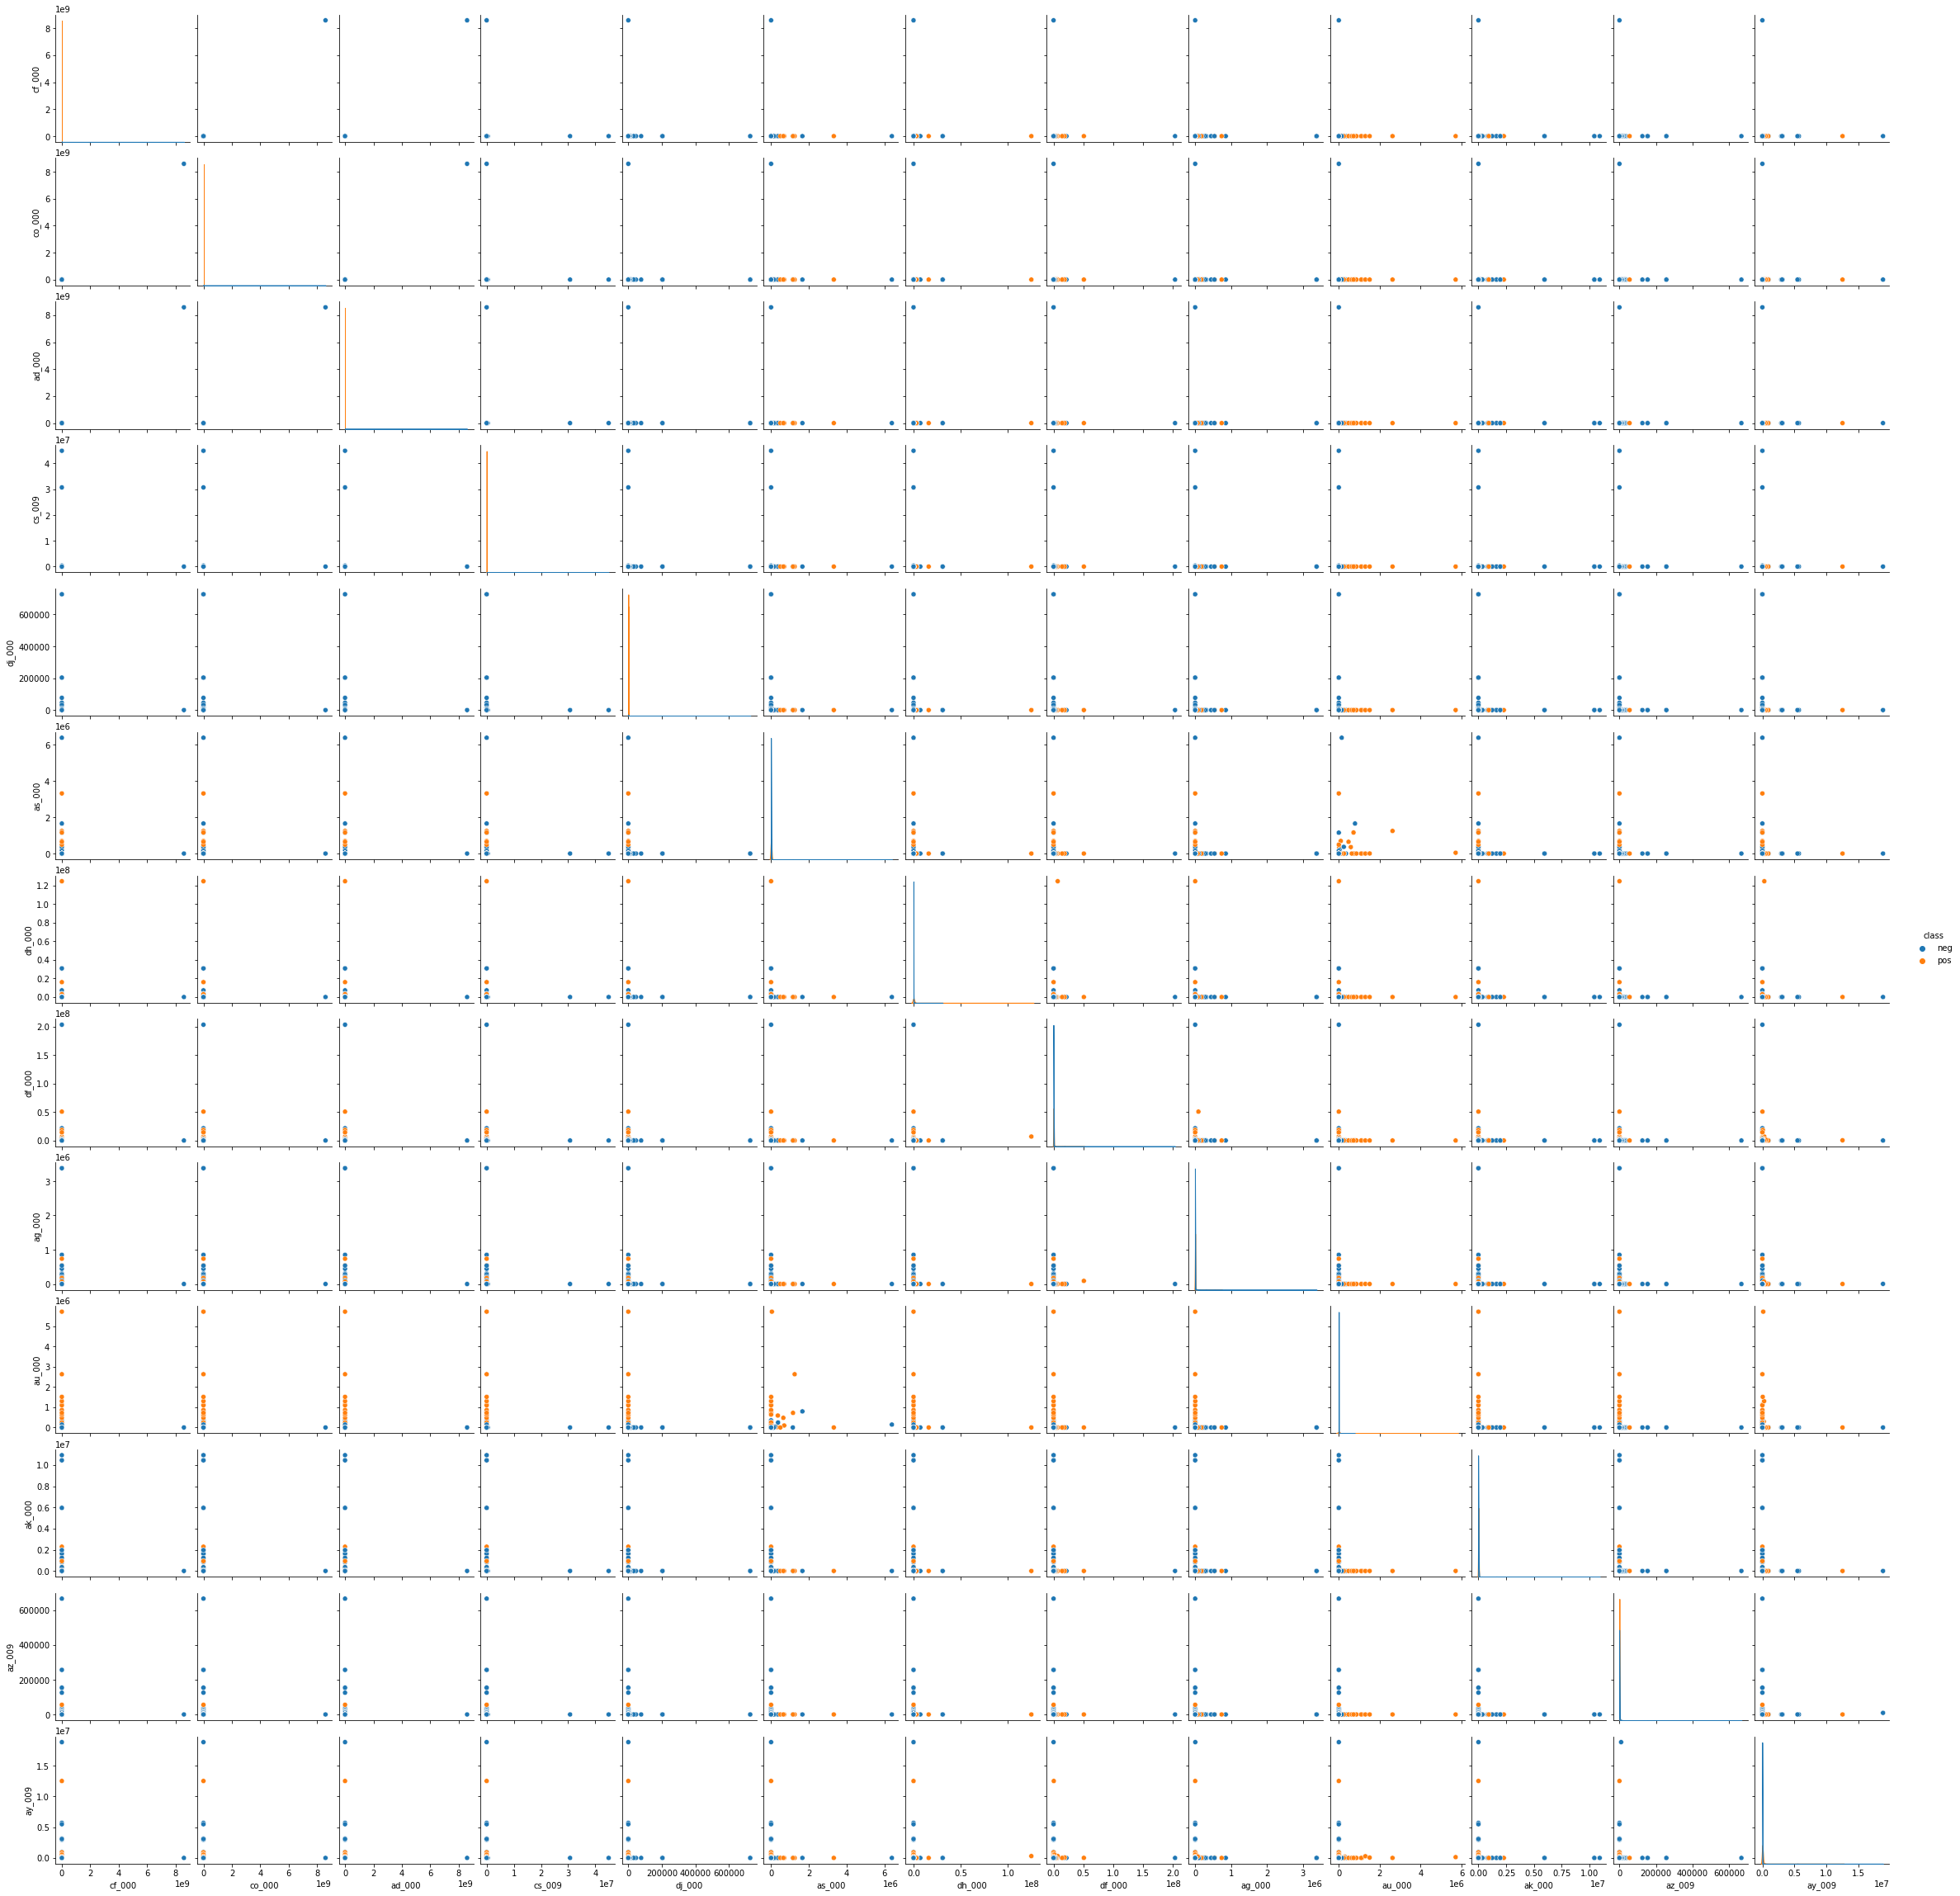

In [9]:
sns.pairplot(cv_df, hue='class')

[None]

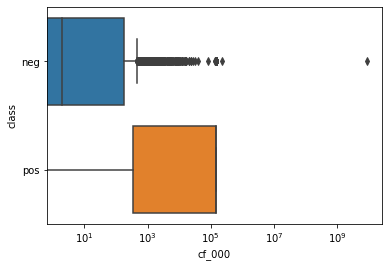

In [10]:
sns.boxplot(data=cv_df, x='cf_000', y='class').set(xscale='log')

[None]

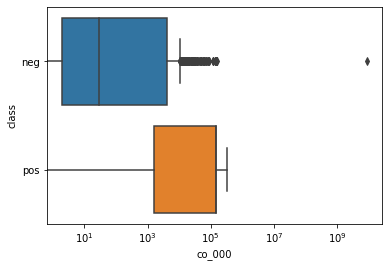

In [11]:
sns.boxplot(data=cv_df, x='co_000', y='class').set(xscale='log')

[None]

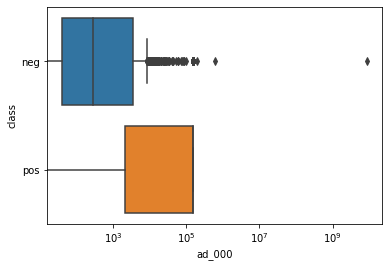

In [12]:
sns.boxplot(data=cv_df, x='ad_000', y='class').set(xscale='log')

[None]

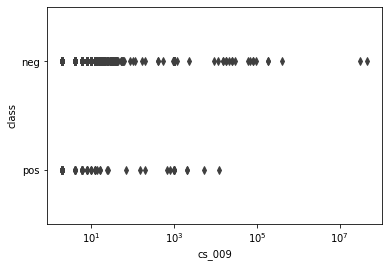

In [13]:
sns.boxplot(data=cv_df, x='cs_009', y='class').set(xscale='log')

[None]

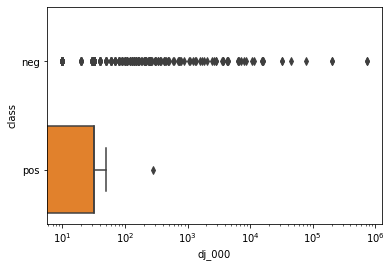

In [14]:
sns.boxplot(data=cv_df, x='dj_000', y='class').set(xscale='log')

[None]

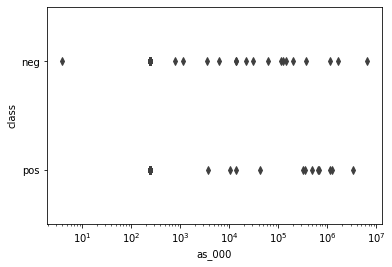

In [15]:
sns.boxplot(data=cv_df, x='as_000', y='class').set(xscale='log')

[None]

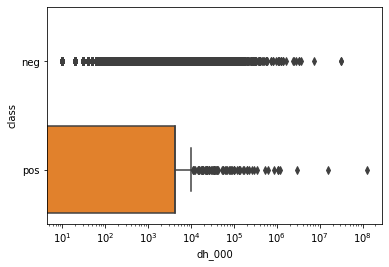

In [16]:
sns.boxplot(data=cv_df, x='dh_000', y='class').set(xscale='log')

[None]

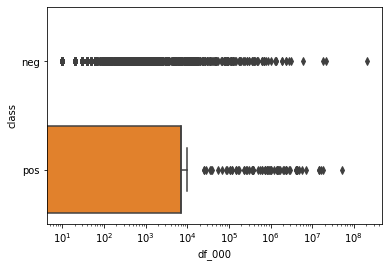

In [17]:
sns.boxplot(data=cv_df, x='df_000', y='class').set(xscale='log')

[None]

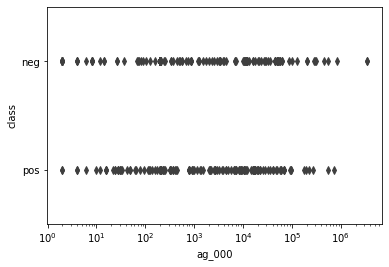

In [18]:
sns.boxplot(data=cv_df, x='ag_000', y='class').set(xscale='log')

[None]

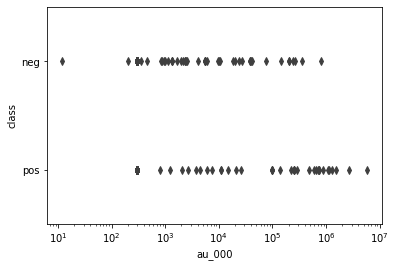

In [19]:
sns.boxplot(data=cv_df, x='au_000', y='class').set(xscale='log')

[None]

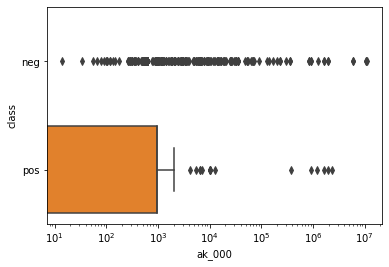

In [20]:
sns.boxplot(data=cv_df, x='ak_000', y='class').set(xscale='log')

[None]

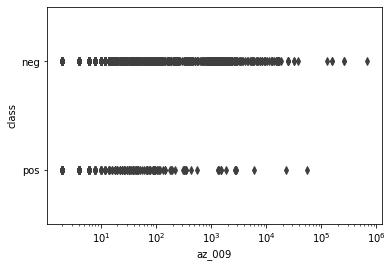

In [21]:
sns.boxplot(data=cv_df, x='az_009', y='class').set(xscale='log')

[None]

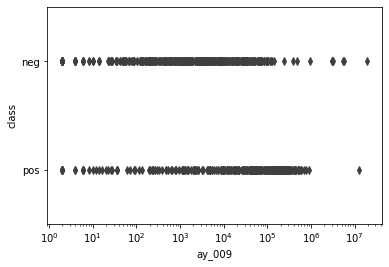

In [22]:
sns.boxplot(data=cv_df, x='ay_009', y='class').set(xscale='log')

No, I cannot draw conclusions about the significance of those features, just by the scatter plots. A lot of the data points overlap, so the scatter plots are sparse and do show a lot of data or information that I can make inferences from.

# Question (1) (b) (v)

In [23]:
print('Number of Positive Data:', len(Y[Y == 'pos']))
print('Number of Negative Data:', len(Y[Y == 'neg']))

Number of Positive Data: 76000
Number of Negative Data: 76000


Yes, this data is very imbalanced.

# Question (1) (c)

In [24]:
X.loc[:, 'data'] = df[['data']]
Y.loc[:, 'data'] = df[['data']]
X_train = X[X['data'].eq('train')].drop(columns=['data'])
Y_train = np.ravel(Y[Y['data'].eq('train')].drop(columns=['data']))
X_test = X[X['data'].eq('test')].drop(columns=['data'])
Y_test = np.ravel(Y[Y['data'].eq('test')].drop(columns=['data']))

In [25]:
clf = RandomForestClassifier(oob_score=True).fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

Train Confusion Matrix:
[[59000     0]
 [    0  1000]]

Train Error: 0.0

Train ROC and AUC: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x308a24df0>


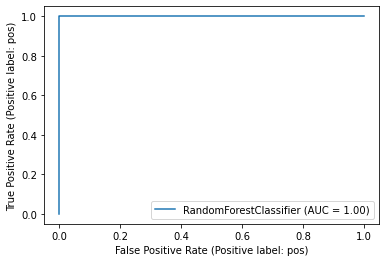

In [26]:
print('Train Confusion Matrix:')
print(confusion_matrix(Y_train, Y_train_pred))
print()
print('Train Error:', 1 - clf.score(X_train, Y_train))
print()
print('Train ROC and AUC:', RocCurveDisplay.from_estimator(clf, X_train, Y_train))

Test Confusion Matrix:
[[15610    15]
 [  109   266]]

Test Error: 0.007750000000000035

Test ROC and AUC: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x2aed94ca0>


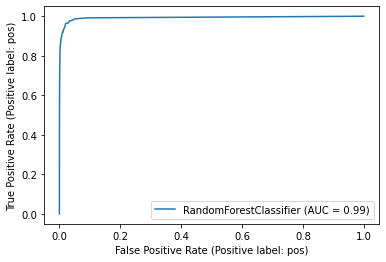

In [27]:
print('Test Confusion Matrix:')
print(confusion_matrix(Y_test, Y_test_pred))
print()
print('Test Error:', 1 - clf.score(X_test, Y_test))
print()
print('Test ROC and AUC:', RocCurveDisplay.from_estimator(clf, X_test, Y_test))

In [28]:
print('OOB Error:', 1 - clf.oob_score_)

OOB Error: 0.006233333333333313


The OOB error estimate for my random forest is quite similar to the test error (0.006 vs 0.007). They differ by only 0.001 (0.1%), which implies that OOB is a better metric to evaluate the performance of my model rather than just the (training) score.

# Question (1) (d)

In [29]:
clf = RandomForestClassifier(oob_score=True, class_weight='balanced').fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

Train Confusion Matrix:
[[59000     0]
 [    1   999]]

Train Error: 1.666666666666483e-05

Train ROC and AUC: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x3097f5280>


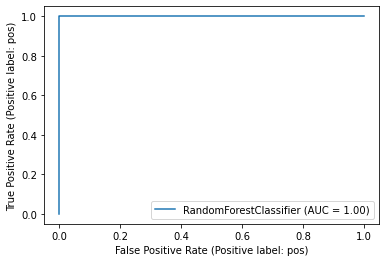

In [30]:
print('Train Confusion Matrix:')
print(confusion_matrix(Y_train, Y_train_pred))
print()
print('Train Error:', 1 - clf.score(X_train, Y_train))
print()
print('Train ROC and AUC:', RocCurveDisplay.from_estimator(clf, X_train, Y_train))

Test Confusion Matrix:
[[15612    13]
 [  159   216]]

Test Error: 0.010750000000000037

Test ROC and AUC: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x30981cdf0>


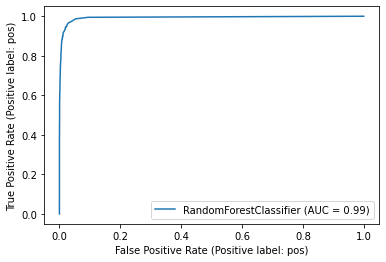

In [31]:
print('Test Confusion Matrix:')
print(confusion_matrix(Y_test, Y_test_pred))
print()
print('Test Error:', 1 - clf.score(X_test, Y_test))
print()
print('Test ROC and AUC:', RocCurveDisplay.from_estimator(clf, X_test, Y_test))

In [32]:
print('OOB Error:', 1 - clf.oob_score_)

OOB Error: 0.007600000000000051


The OOB error estimate for my random forest is quite similar to the test error (0.0076 vs 0.01). They differ by only 0.0024 (0.24%), which implies that OOB is a better metric to evaluate the performance of my model rather than just the (training) score.

Comparing my results to (1)(c), the test error for the balanced dataset was higher than that of the imbalanced dataset. This is to be expected, because without compensating class imbalance, my model will overfit to the data of the common class. When the class is properly balanced, the model will overfit less since the data no longer contains a highly dominant common class. Because the model is overfit less, the accuracy will decrease but should give better predictions overall.

# Question (1) (e)

In [46]:
warnings.simplefilter(action='ignore', category=FutureWarning)

Y_train[Y_train == 'pos'] = 1
Y_train[Y_train == 'neg'] = 0
Y_train = Y_train.astype(int)

Y_test[Y_test == 'pos'] = 1
Y_test[Y_test == 'neg'] = 0
Y_test = Y_test.astype(int)

In [47]:
clf = xgb.XGBClassifier()
grid_cv = GridSearchCV(clf, {'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100]})
grid_cv.fit(X_train, Y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9946833333333334
{'reg_alpha': 0}


In [48]:
clf = xgb.XGBClassifier(reg_alpha=0).fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

Train Confusion Matrix:
[[59000     0]
 [    1   999]]

Train Error: 1.666666666666483e-05

Train ROC and AUC: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x309b7c940>


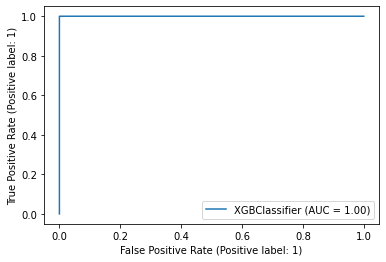

In [49]:
print('Train Confusion Matrix:')
print(confusion_matrix(Y_train, Y_train_pred))
print()
print('Train Error:', 1 - clf.score(X_train, Y_train))
print()
print('Train ROC and AUC:', RocCurveDisplay.from_estimator(clf, X_train, Y_train))

Test Confusion Matrix:
[[15608    17]
 [   84   291]]

Test Error: 0.006312500000000054

Test ROC and AUC: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x30e457250>


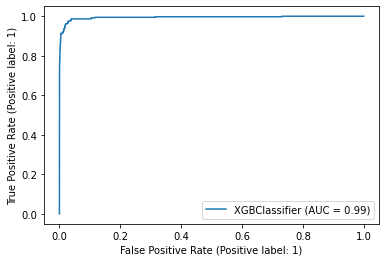

In [50]:
print('Test Confusion Matrix:')
print(confusion_matrix(Y_test, Y_test_pred))
print()
print('Test Error:', 1 - clf.score(X_test, Y_test))
print()
print('Test ROC and AUC:', RocCurveDisplay.from_estimator(clf, X_test, Y_test))

# Question (1) (e)

In [53]:
sm = SMOTE()
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
X_test_res, Y_test_res = sm.fit_resample(X_test, Y_test)

In [54]:
clf = xgb.XGBClassifier()
grid_cv = GridSearchCV(clf, {'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100]})
grid_cv.fit(X_train_res, Y_train_res)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9973305084745763
{'reg_alpha': 1}


In [58]:
clf = xgb.XGBClassifier(reg_alpha=1).fit(X_train_res, Y_train_res)
Y_train_pred = clf.predict(X_train_res)
Y_test_pred = clf.predict(X_test_res)

Train Confusion Matrix:
[[59000     0]
 [    2 58998]]

Train Error: 1.694915254235596e-05

Train ROC and AUC: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x309727520>


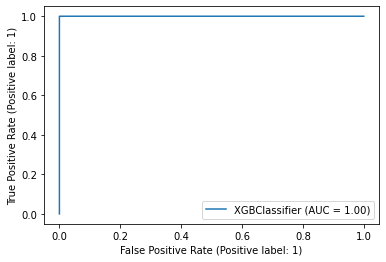

In [59]:
print('Train Confusion Matrix:')
print(confusion_matrix(Y_train_res, Y_train_pred))
print()
print('Train Error:', 1 - clf.score(X_train_res, Y_train_res))
print()
print('Train ROC and AUC:', RocCurveDisplay.from_estimator(clf, X_train_res, Y_train_res))

Test Confusion Matrix:
[[15580    45]
 [  412 15213]]

Test Error: 0.01462399999999997

Test ROC and AUC: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x308f9b2b0>


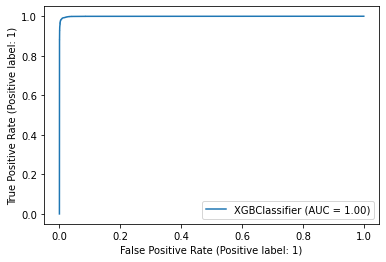

In [60]:
print('Test Confusion Matrix:')
print(confusion_matrix(Y_test_res, Y_test_pred))
print()
print('Test Error:', 1 - clf.score(X_test_res, Y_test_res))
print()
print('Test ROC and AUC:', RocCurveDisplay.from_estimator(clf, X_test_res, Y_test_res))